In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best20.csv")
df = df.drop_duplicates()
print(df.head())

       KLHL21        LZIC   MIR8086        GHITM       FBXW4       NLRP6  \
0  408.378949  119.082494  1.000000   958.714995  168.195613  162.813354   
1  253.319773  118.435219  1.000000  1178.869074  178.749450   81.150057   
2  532.444640  122.686792  4.009372   962.249350  149.148649  180.421753   
3  391.074568  132.363700  1.000000  1472.846990  105.890960  409.124164   
4  399.819591  139.601812  1.116815  1269.818087  147.419514  136.251369   

     MIR4537        HBA1        KAT8        NFIX  ...     ZNF582   MIR663AHG  \
0  12.782867  422.507380  229.418816  173.577873  ...  22.201821  956.023865   
1  16.449336   87.729792  279.638711  100.889260  ...  18.642581  652.490325   
2   4.811247  258.203576  278.250437  139.526156  ...  23.254359  230.137969   
3   2.406613   93.857896  305.639816   57.758705  ...  43.319029  454.849806   
4  13.401774  751.616158  217.778828  211.077941  ...  26.803548   64.775241   

       WNT7B         PXK  LOC101243545      EDNRA       MAP1B 

In [3]:
# def map_results(inpt):
#     if inpt == 'control':
#         return 0;

#     else:
#         return 1;

In [4]:
# df['Results'] = df['Results'].apply(map_results)
# print(df.head())

In [5]:

df.describe()

,KLHL21,LZIC,MIR8086,GHITM,FBXW4,NLRP6,MIR4537,HBA1,KAT8,NFIX,...,ZNF582,MIR663AHG,WNT7B,PXK,LOC101243545,EDNRA,MAP1B,MIR4660,KANTR,Results
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,341.190567,136.380108,1.401351,1316.600825,160.215432,169.348899,9.362595,5631.022563,266.777843,201.365632,...,29.506354,681.840503,3.812238,256.507771,85.236171,4.479150,20716.912287,1.199968,68.295853,0.431034
std,132.385307,48.225795,1.086796,417.421640,62.692747,134.415089,8.547251,22376.681531,45.054985,451.931080,...,9.753641,1065.674828,5.920368,75.158344,86.748891,7.407578,84011.721085,0.851495,18.337080,0.497369
min,66.370880,80.726335,1.000000,551.370727,72.174788,5.006662,1.000000,5.788649,165.482936,6.753424,...,5.620869,8.483496,1.000000,92.618381,1.000000,1.000000,2.165143,1.000000,10.013325,0.000000
25%,262.744890,113.147906,1.000000,1111.321750,128.284451,102.645681,3.681635,45.582804,235.568519,69.344060,...,23.326957,83.343558,1.000000,214.513117,25.079348,1.000000,24.096767,1.000000,56.578993,0.000000
50%,315.817003,126.301624,1.000000,1266.457106,149.552023,137.750146,5.962768,225.706240,266.388902,94.318849,...,29.094008,300.196621,1.000000,247.881034,38.451703,1.130005,197.766605,1.000000,70.584817,0.000000
75%,393.077684,143.457188,1.298399,1436.113204,175.558203,191.200896,12.593158,757.331937,285.892972,155.725190,...,33.859239,770.164663,3.388339,282.903629,128.311941,3.876511,626.153699,1.000000,80.458632,1.000000
max,1136.361050,467.984177,10.593863,4642.026371,600.611272,848.504583,39.113255,165229.888600,505.662279,3351.676152,...,69.124421,7208.064725,35.243380,707.927191,385.882601,41.483800,575118.397900,9.636110,105.574372,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['KLHL21', 'LZIC', 'MIR8086', 'GHITM', 'FBXW4', 'NLRP6', 'MIR4537', 'HBA1', 'KAT8', 'NFIX', 'JUND', 'ZNF582', 'MIR663AHG', 'WNT7B', 'PXK', 'LOC101243545', 'EDNRA', 'MAP1B', 'MIR4660', 'KANTR', 'Results']
21


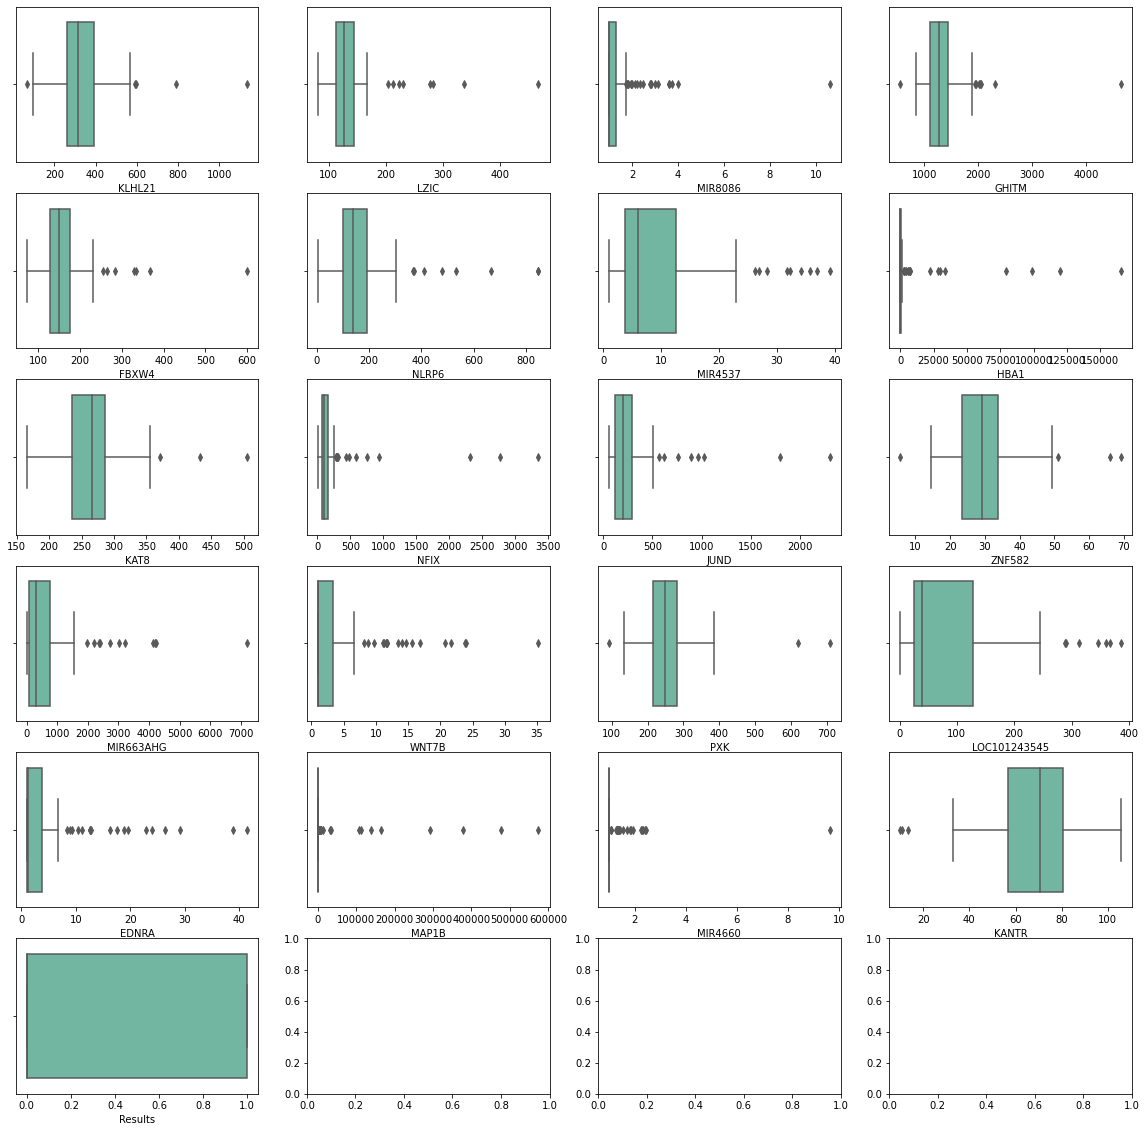

In [7]:
fig, axes = plt.subplots(6,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    else:
        y_ += 1

In [8]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['KLHL21', 'LZIC', 'MIR8086', 'GHITM', 'FBXW4', 'NLRP6', 'MIR4537',
       'HBA1', 'KAT8', 'NFIX', 'JUND', 'ZNF582', 'MIR663AHG', 'WNT7B', 'PXK',
       'LOC101243545', 'EDNRA', 'MAP1B', 'MIR4660', 'KANTR', 'Results'],
      dtype='object')
     KLHL21      LZIC   MIR8086     GHITM     FBXW4     NLRP6   MIR4537  \
0  0.319637  0.099046  0.000000  0.099579  0.181707  0.187086  0.309154   
1  0.174720  0.097374  0.000000  0.153398  0.201679  0.090271  0.405353   
2  0.435587  0.108353  0.313677  0.100443  0.145663  0.207961  0.099998   
3  0.303464  0.133341  0.000000  0.225264  0.063804  0.479097  0.036906   
4  0.311637  0.152032  0.012176  0.175631  0.142391  0.155596  0.325393   

       HBA1      KAT8      NFIX  ...    ZNF582  MIR663AHG     WNT7B       PXK  \
0  0.002522  0.187948  0.049874  ...  0.261103   0.131610  0.088680  0.332762   
1  0.000496  0.335575  0.028143  ...  0.205055   0.089451  0.000000  0.229092   
2  0.001528  0.331494  0.039694  ...  0.277677   0.030787  

In [9]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

0    66
1    50
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

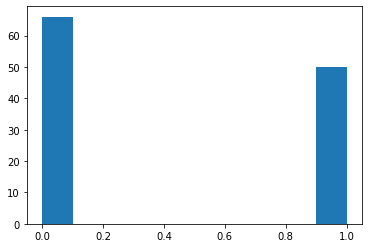

In [10]:
plt.hist(y)

1    66
0    66
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

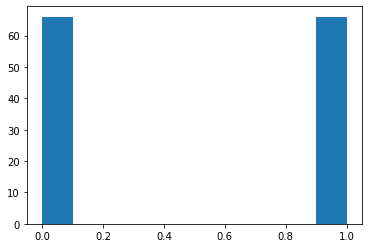

In [11]:
smt = SMOTE()
X, Y = smt.fit_resample(x,y)
print(Y.value_counts())
plt.hist(Y)

In [12]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  75.000
Standed deviation :  2.273
CV value :  3
Parameters :  {}
Accuracy :  75.758
Standed deviation :  3.863
CV value :  4
Parameters :  {}
Accuracy :  75.758
Standed deviation :  5.249
CV value :  5
Parameters :  {}
Accuracy :  73.533
Standed deviation :  9.671


In [13]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 5}
Accuracy :  87.121
Standed deviation :  0.758
CV value :  3
Parameters :  {'random_state': 3}
Accuracy :  84.848
Standed deviation :  4.670
CV value :  4
Parameters :  {'random_state': 1}
Accuracy :  84.848
Standed deviation :  5.669
CV value :  5
Parameters :  {'random_state': 2}
Accuracy :  84.103
Standed deviation :  5.043


In [14]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 3}
Accuracy :  78.788
Standed deviation :  0.000
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  77.273
Standed deviation :  1.856
CV value :  4
Parameters :  {'n_neighbors': 3}
Accuracy :  80.303
Standed deviation :  9.936
CV value :  5
Parameters :  {'n_neighbors': 3}
Accuracy :  78.803
Standed deviation :  10.141


In [15]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  67.424
Standed deviation :  6.818
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  71.212
Standed deviation :  5.357
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  71.212
Standed deviation :  9.702
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  73.504
Standed deviation :  7.136


In [16]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  65.152
Standed deviation :  10.606
CV value :  3
Parameters :  {}
Accuracy :  62.879
Standed deviation :  2.143
CV value :  4
Parameters :  {}
Accuracy :  65.909
Standed deviation :  9.185
CV value :  5
Parameters :  {}
Accuracy :  63.561
Standed deviation :  7.432


In [17]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  80.303
Standed deviation :  6.061
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  77.273
Standed deviation :  3.214
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  78.030
Standed deviation :  11.809
CV value :  5
Parameters :  {'kernel': 'rbf'}
Accuracy :  75.783
Standed deviation :  3.654


In [18]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 90, 'max_features': 6, 'n_estimators': 100}
Accuracy :  86.364
Standed deviation :  3.030
CV value :  3
Parameters :  {'max_depth': 90, 'max_features': 6, 'n_estimators': 200}
Accuracy :  84.091
Standed deviation :  3.214
CV value :  4
Parameters :  {'max_depth': 110, 'max_features': 2, 'n_estimators': 100}
Accuracy :  88.636
Standed deviation :  4.968
CV value :  5
Parameters :  {'max_depth': 150, 'max_features': 2, 'n_estimators': 100}
Accuracy :  86.410
Standed deviation :  5.043
